In [13]:
import librosa
from PIL import Image
import numpy as np
import pretty_midi_fluidsynth as pmf

import matplotlib.pyplot as plt
import librosa.display

import os

In [14]:
data_path = './test_data'
x_path = os.path.join(data_path,'wav')
y_path = os.path.join(data_path,'midi')

In [15]:
len(os.listdir(y_path))

180

In [16]:
hop_len = 441
freq_w = 4
octave = 8

n_bins = 12*freq_w*octave
bins_per_octave = 12*freq_w

sr = 44100
fs = 25

idx=0

# midi

In [17]:
file_list = os.listdir(y_path)
path = os.path.join(y_path,file_list[idx])

midi_data = pmf.PrettyMIDI(path)

piano_roll = midi_data.get_piano_roll(fs)

start_pitch = 24
end_pitch = 120

piano_roll[start_pitch:end_pitch,:].shape

(96, 300)

In [18]:
sec = piano_roll.shape[1]//fs
sec

12

c:\Users\AI_server\miniconda3\envs\MA\lib\site-packages\librosa\util\decorators.py:88: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  return f(*args, **kwargs)


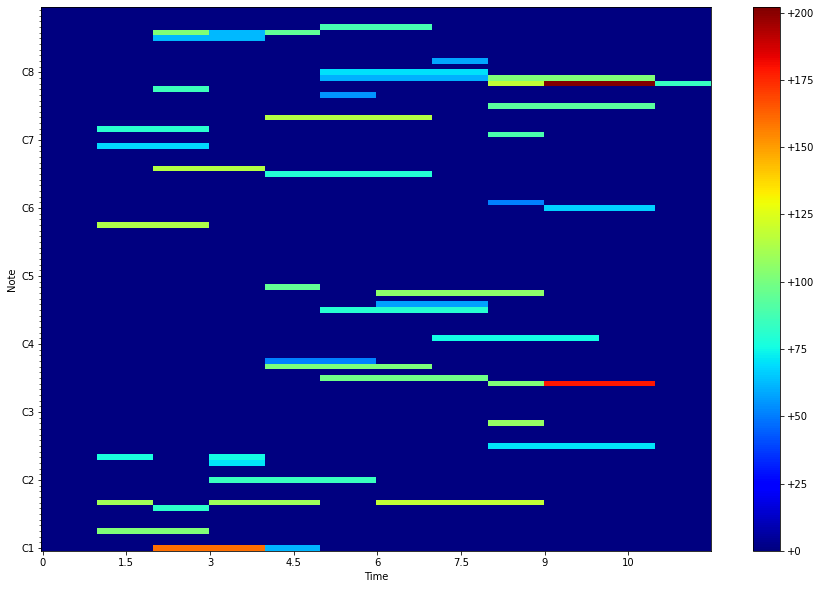

In [26]:
fig, ax = plt.subplots(1,1,figsize=(15,10))
img = librosa.display.specshow(
    piano_roll[start_pitch:end_pitch,:],
    hop_length=1,
    sr=fs,
    ax=ax,
    x_axis='time',
    y_axis='cqt_note',
    cmap='jet',
    fmin=pmf.note_number_to_hz(start_pitch)
)
fig.colorbar(img, ax=ax, format="%+2d")
plt.show()

In [20]:
piano_roll.max()

202.0

# wav

In [21]:
file_list = os.listdir(x_path)
path = os.path.join(x_path,file_list[idx])
audio_data, _ = librosa.load(path,sr=sr)
audio_data.shape[0]//sr

13

In [22]:
cqt = librosa.cqt(audio_data, sr=sr,
                  hop_length= hop_len,
                  n_bins= 12*freq_w*octave,
                  bins_per_octave= 12*freq_w,
                 )

In [23]:
cqt[:,:sr//hop_len*sec].shape

(384, 1200)

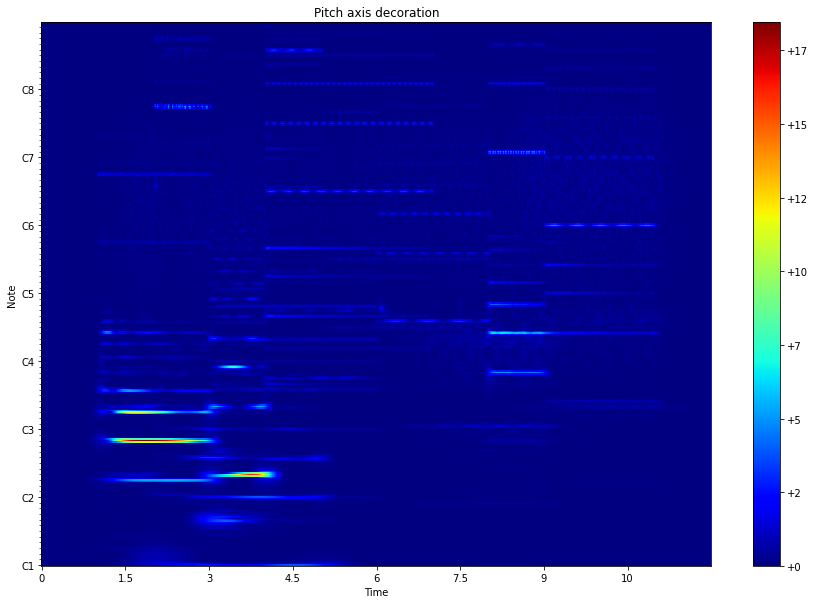

In [24]:
fig, ax = plt.subplots(1,1,figsize=(15,10))
img = librosa.display.specshow(np.abs(cqt[:,:sr//hop_len*sec]), sr=sr,
                               x_axis='time',
                               y_axis='cqt_note', 
                               ax=ax,
                               hop_length= hop_len,
                               bins_per_octave= 12*freq_w,
                               cmap='jet'
                               )
ax.set(title='Pitch axis decoration')
fig.colorbar(img, ax=ax, format="%+2d")
# for i in beat_times:
#     ax.axvline(i,c='k')

plt.show()